# Clustering Assignment

## Objective

- The objective of this assignment is to introduce to various clustering algorithms, including K-Means, and hierarchical and provide hands-on experience in applying these techniques to a real-world dataset.

In [1]:
# Importing the basic libraries needed in the assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')

In [2]:
# Reading the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

## 👀 Exploring the Dataset

In [3]:
def initial_exploration(data):
    print(f"Descriptive Analysis: \n{df.describe()}")
    print('-' * 80)
    print(f"Info of the Dataset: \n{df.info()}")
    print('-' * 80)
    print(f"Missing Values: \n{df.isnull().sum()}")
    print('-' * 80)
    print(f"Duplicate Values: {df.duplicated().sum()}")
    print('-' * 80)
    print(f"Dataset Columns: \n{df.columns}")
    print('-' * 80)
    print(f"Dataset Data Types: \n{df.dtypes}")

In [4]:
initial_exploration(df)

Descriptive Analysis: 
               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.0000

- All datatypes are integer, so, no need to change them.
- No duplicates or missing values found.
- Outliers found in some of the columns but not yet confirmed, will confirm using Boxplots.

In [5]:
# Scaling the dataset before visualizations

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [6]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
## Renaming the columns for better access

df_scaled.rename(columns = {'ID#' : 'ID', 'Flight_miles_12mo' : 'miles_12mo', 'Flight_trans_12' : 'trans_12mo', 'Days_since_enroll' : 'days_enroll', 'Award?' : 'award'}, inplace = True)

In [8]:
feature_names = df_scaled.columns

In [9]:
df_scaled

ID   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0    -1.735125 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767   
1    -1.734263 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767   
2    -1.733402 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767   
3    -1.732540 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767   
4    -1.731679  0.239678   -0.186299   1.409471  -0.098242  -0.062767   
...        ...       ...         ...        ...        ...        ...   
3994  1.725097 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767   
3995  1.725958 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767   
3996  1.726820 -0.000043   -0.186299   0.683121  -0.098242  -0.062767   
3997  1.727682 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767   
3998  1.728543 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767   

      Bonus_miles  Bonus_trans  miles_12mo  trans_12mo  days_enroll     award  
0       -0.702786    -1.104065   -0.328603   -0.362168     1.395454 -0.766919  
1       -0.701088    -0.999926   -0.328603   -0.362168     1.379957 -0.766919  
2       -0.539253    -0.791649   -0.328603   -0.362168     1.411920 -0.766919  
3       -0.689286    -1.104065   -0.328603   -0.362168     1.372208 -0.766919  
4        1.083121     1.499394    1.154932    0.692490     1.363975  1.303918  
...           ...          ...         ...         ...          ...       ...  
3994    -0.356960    -0.791649   -0.185750   -0.098503    -1.315120  1.303918  
3995    -0.669367    -0.687511   -0.328603   -0.362168    -1.318994  1.303918  
3996     0.343804    -0.375096   -0.328603   -0.362168    -1.315604  1.303918  
3997    -0.689286    -1.104065    0.028531   -0.098503    -1.316088 -0.766919  
3998    -0.709992    -1.208203   -0.328603   -0.362168    -1.317541 -0.766919  

[3999 rows x 12 columns]

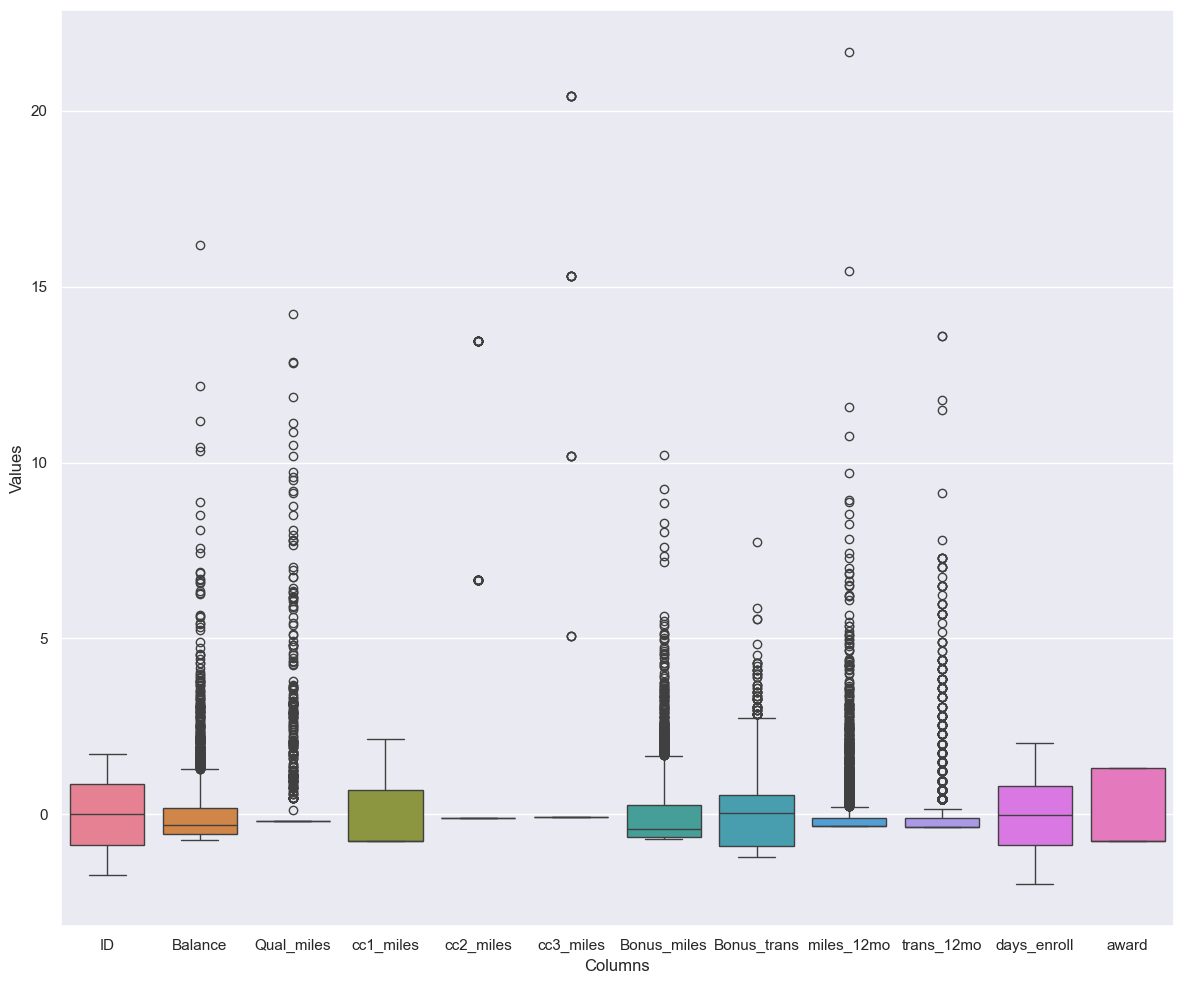

In [10]:
plt.figure(figsize=(12, 10))
sns.boxplot(df_scaled)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

### Capping Outliers

In [11]:
def capping(data, columns):
    """
    Caps outliers in each numeric column of the DataFrame using IQR-based thresholds.

    Parameters:
        data (pd.DataFrame): Input DataFrame with numeric columns.
        columns (list): List of column names to apply capping.

    Returns:
        pd.DataFrame: DataFrame with capped values.
    """
    data_capped = data.copy()
    for col in columns:
        q1 = data_capped[col].quantile(0.25)
        q3 = data_capped[col].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        data_capped[col] = np.where(data_capped[col] > upper, upper,
                            np.where(data_capped[col] < lower, lower, data_capped[col]))
    return data_capped

df_capped = capping(df_scaled, df_scaled.columns)

## 📈 Data Visulizations

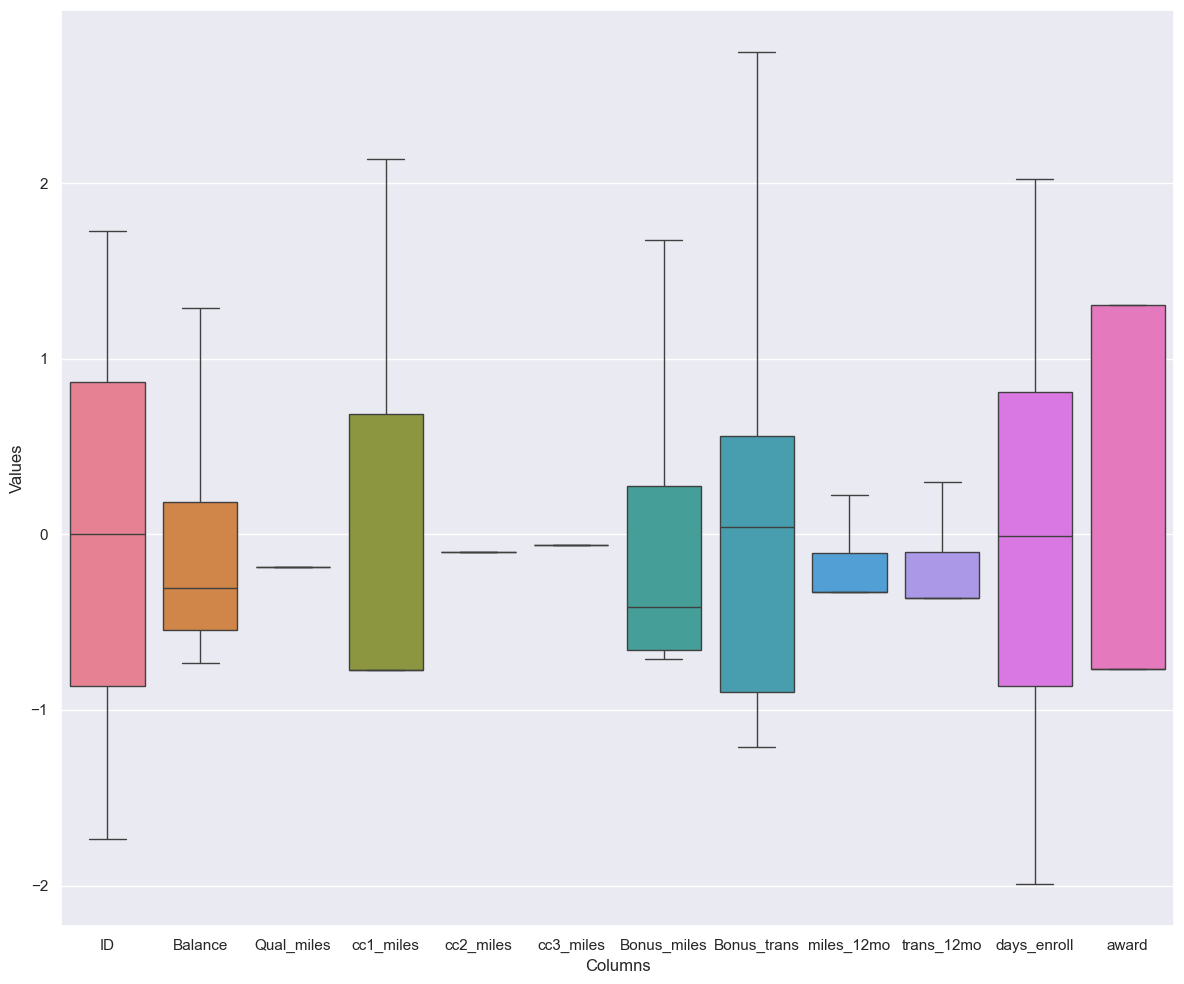

In [12]:
plt.figure(figsize=(12, 10))
sns.boxplot(df_capped)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

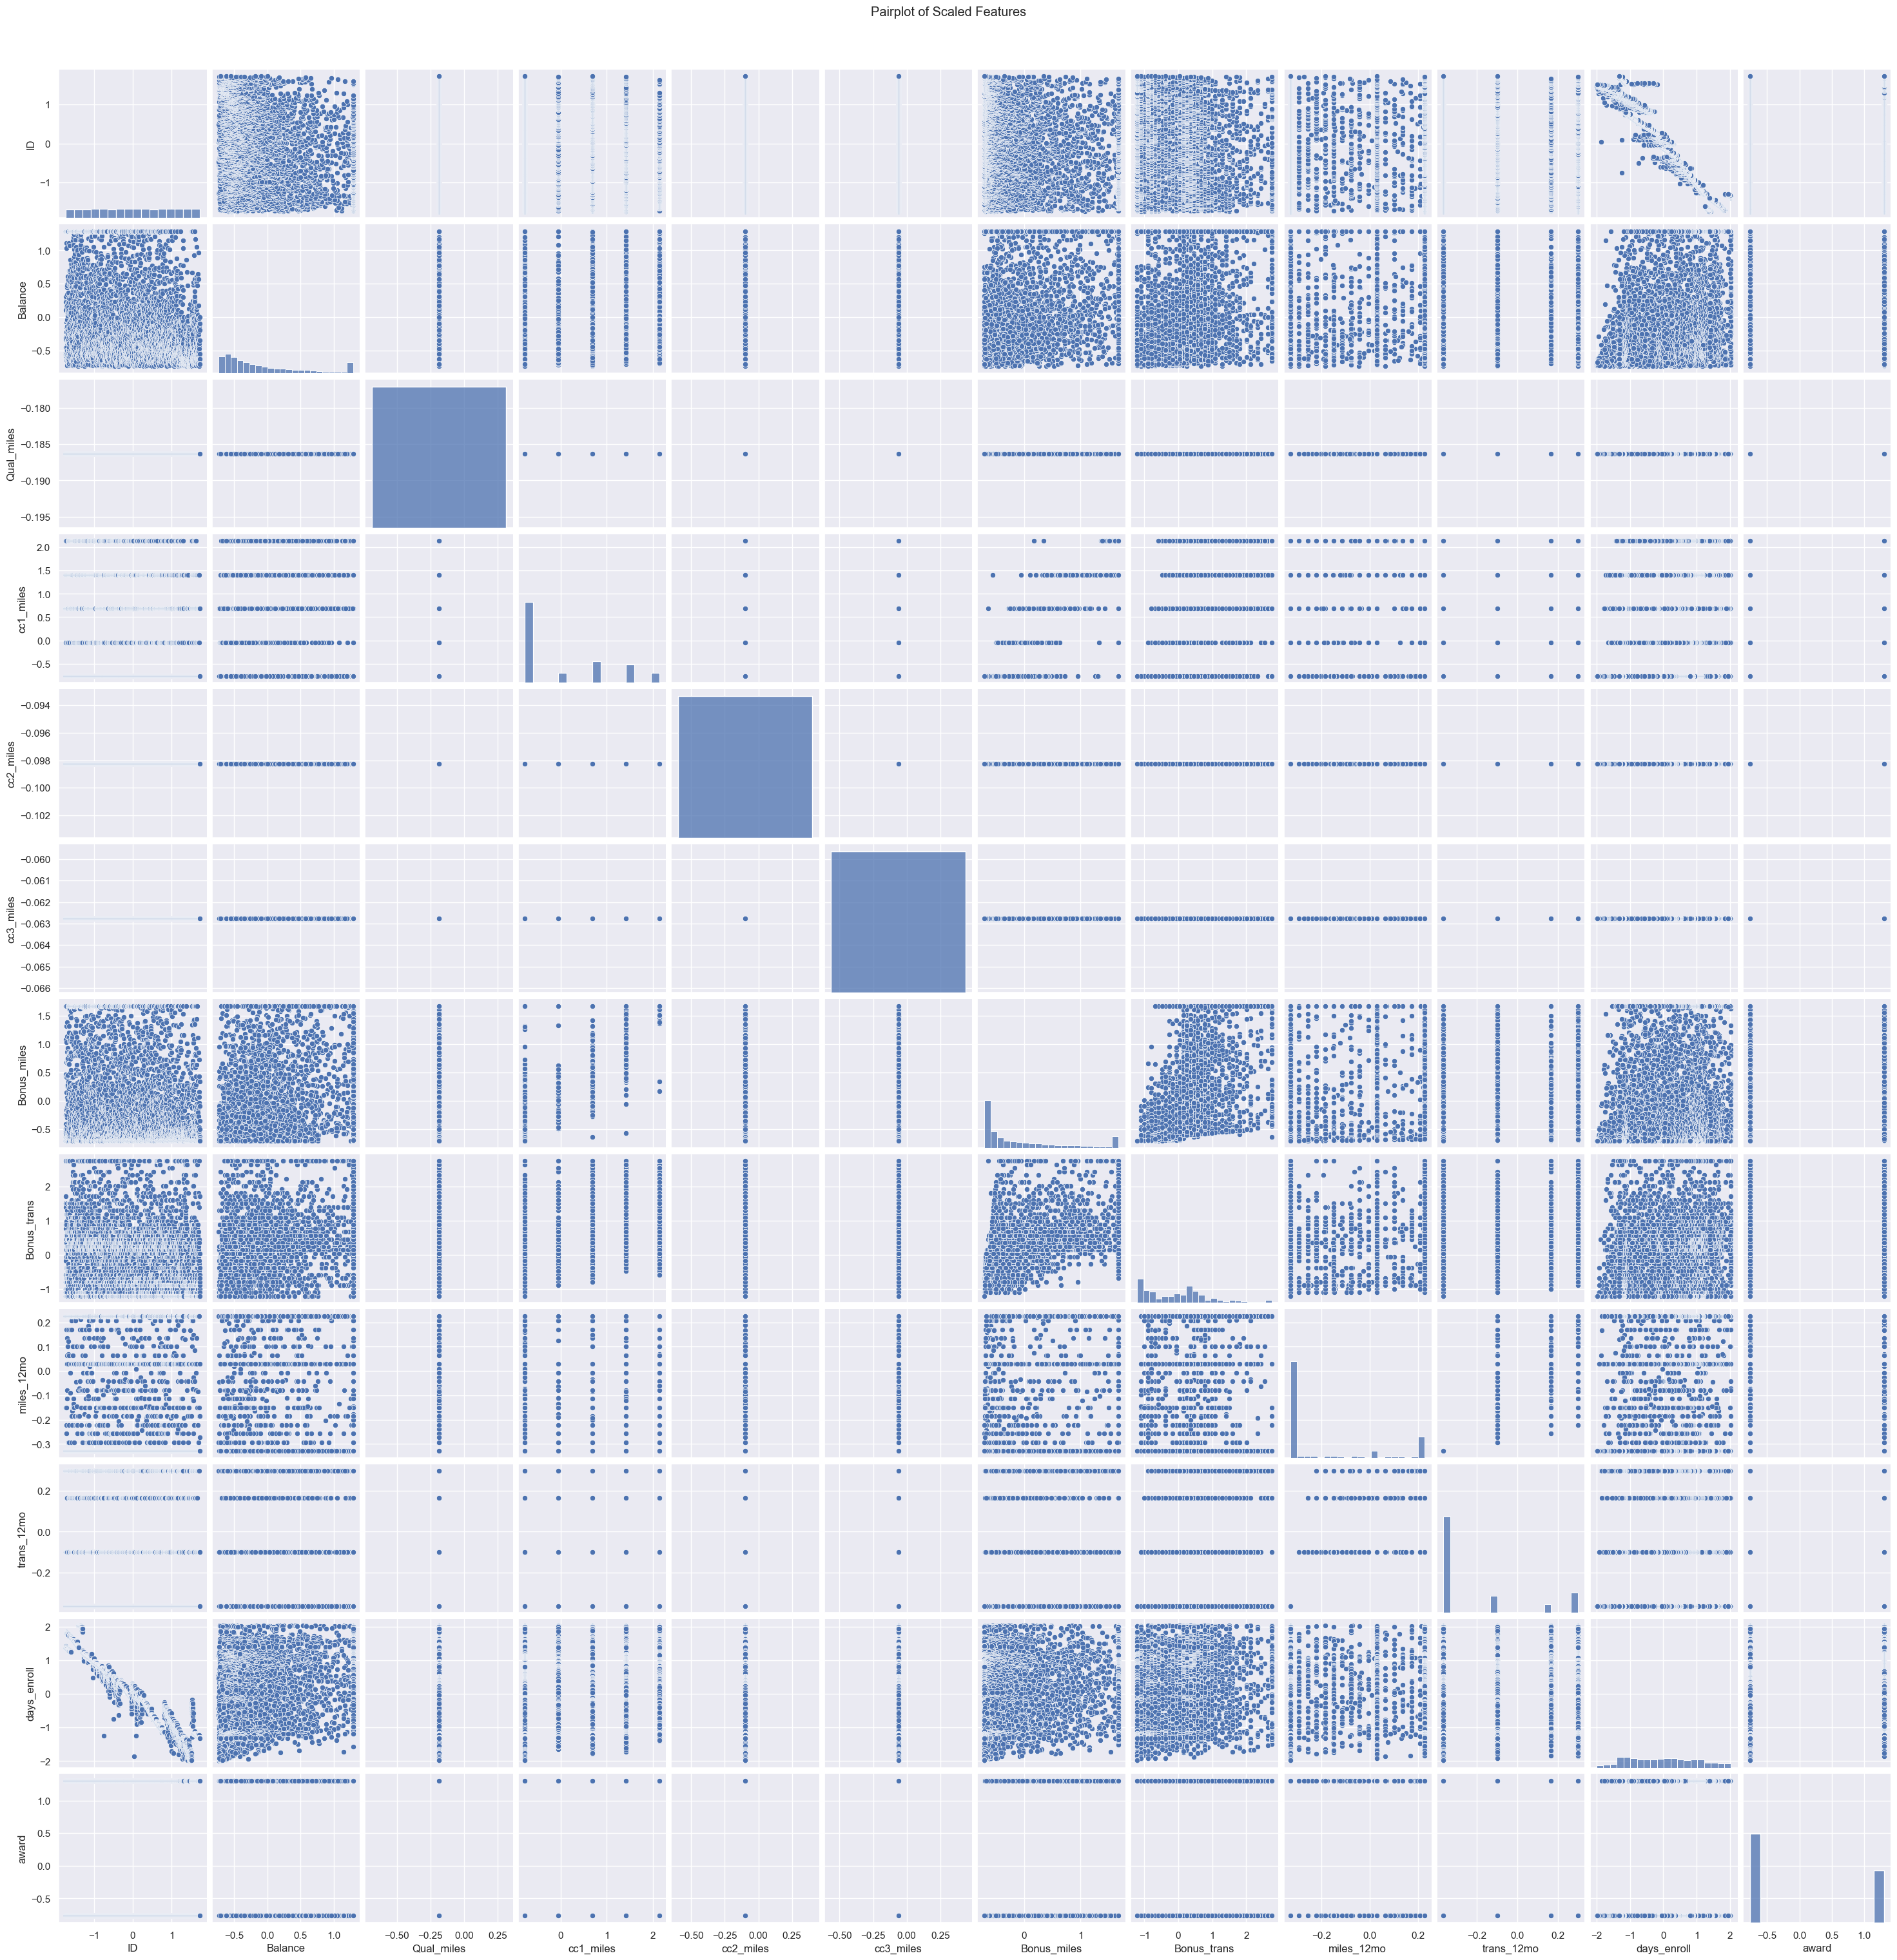

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Pairplot to observe feature relationships
sns.pairplot(pd.DataFrame(df_capped, columns=feature_names))
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

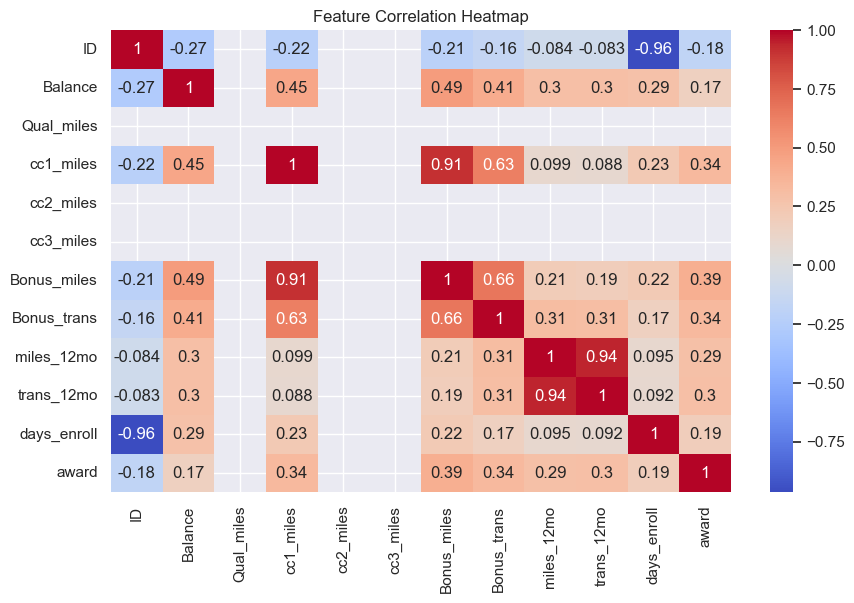

In [14]:
# 2. Heatmap of feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(df_capped, columns=feature_names).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

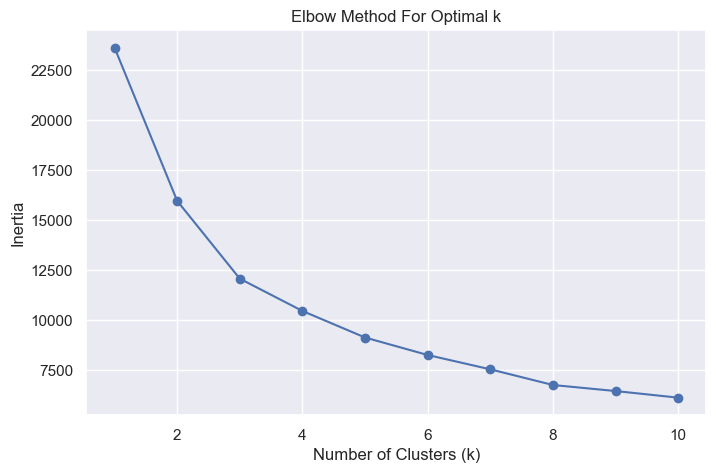

In [15]:
# 3. Elbow Method for KMeans
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_capped)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

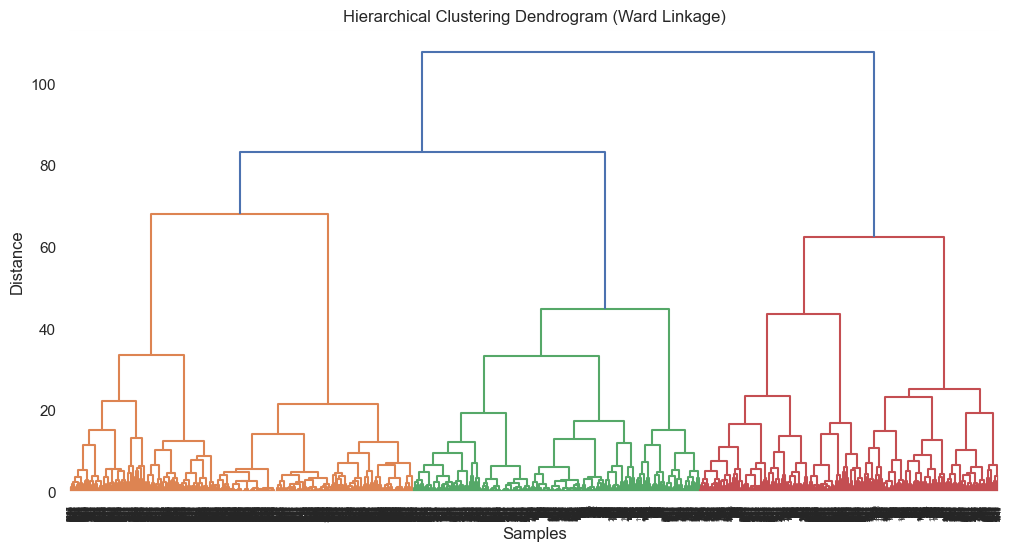

In [16]:
# 4. Dendrogram for Hierarchical Clustering
linked = linkage(df_capped, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## 🏗️ Model Building

In [17]:
# 5. PCA for 2D Cluster Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_capped)

### K-Means

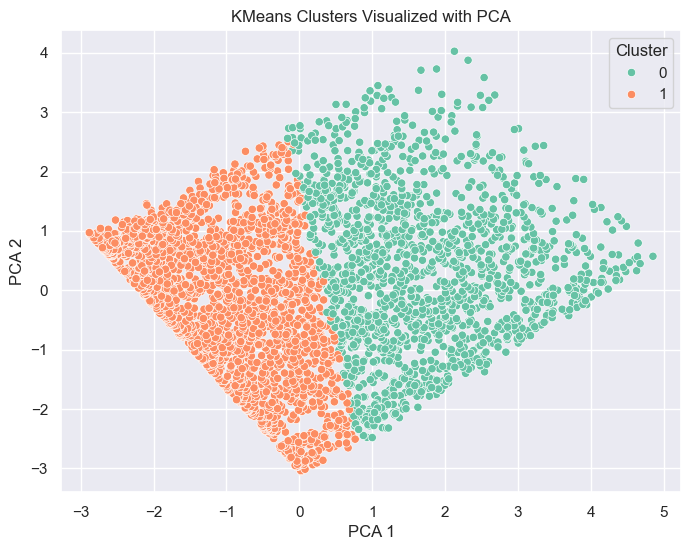

In [18]:
# Apply KMeans with optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(df_capped)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set2')
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

### 3D Visualization of the Clusters

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(df_capped)

# Fit KMeans again if needed
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_capped)

import plotly.express as px

# Prepare DataFrame for Plotly
pca_df = pd.DataFrame(reduced_data_3d, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = labels.astype(str)

# Plotly 3D scatter
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3',
                    color='Cluster', color_discrete_sequence=px.colors.qualitative.Bold,
                    title='KMeans Clusters in 3D PCA Space')
fig.update_traces(marker=dict(size=5))
fig.show()

In [20]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_capped, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2885


In [21]:
print(f"Inertia: {kmeans.inertia_:.2f}")

Inertia: 12066.71


In [22]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_capped, labels)
print(f"Davies-Bouldin Index: {db_score:.4f}")

Davies-Bouldin Index: 1.2331


### Hierarchical Clustering

- Trying out different linkage methods for better understanding.

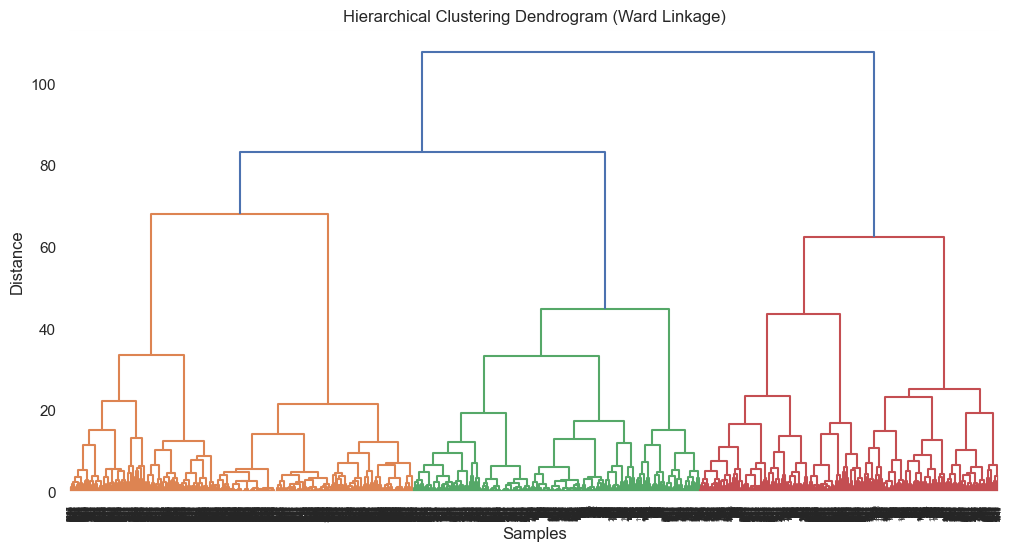

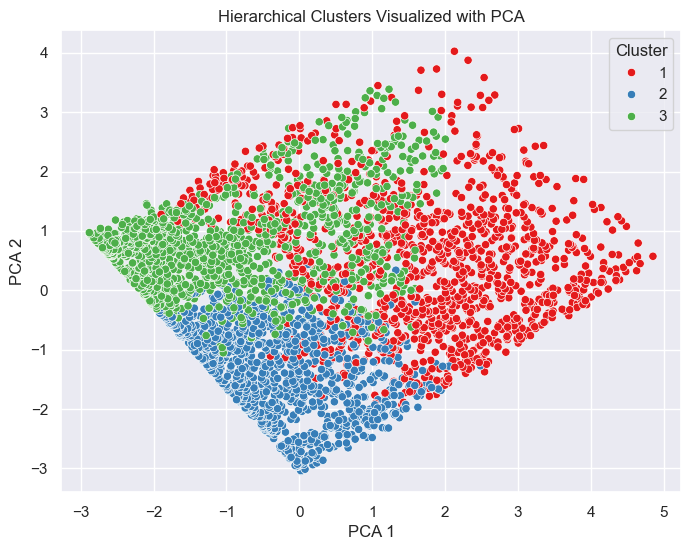

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix using Ward method
linked = linkage(df_capped, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 3 clusters)
hier_labels = fcluster(linked, t=3, criterion='maxclust')

from sklearn.decomposition import PCA
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=hier_labels, palette='Set1')
plt.title('Hierarchical Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

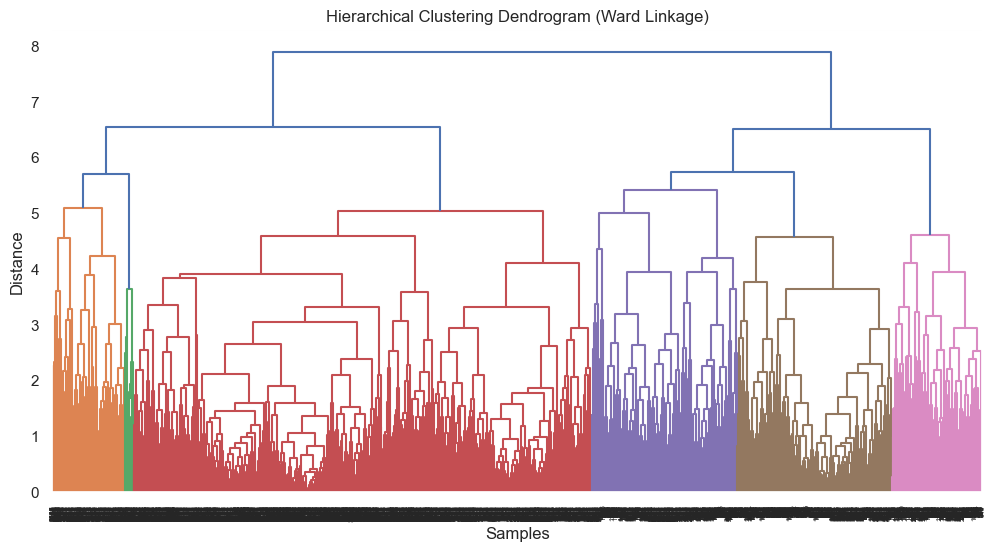

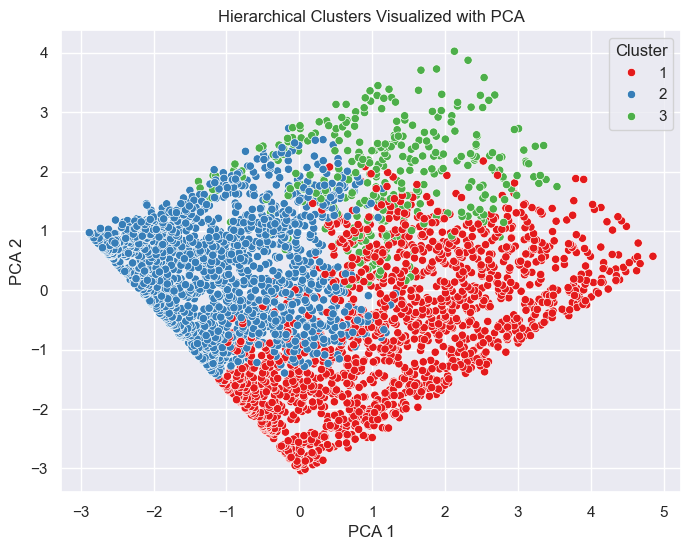

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix using Ward method
com_linked = linkage(df_capped, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(com_linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 3 clusters)
hier_labels = fcluster(com_linked, t=3, criterion='maxclust')

from sklearn.decomposition import PCA
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=hier_labels, palette='Set1')
plt.title('Hierarchical Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

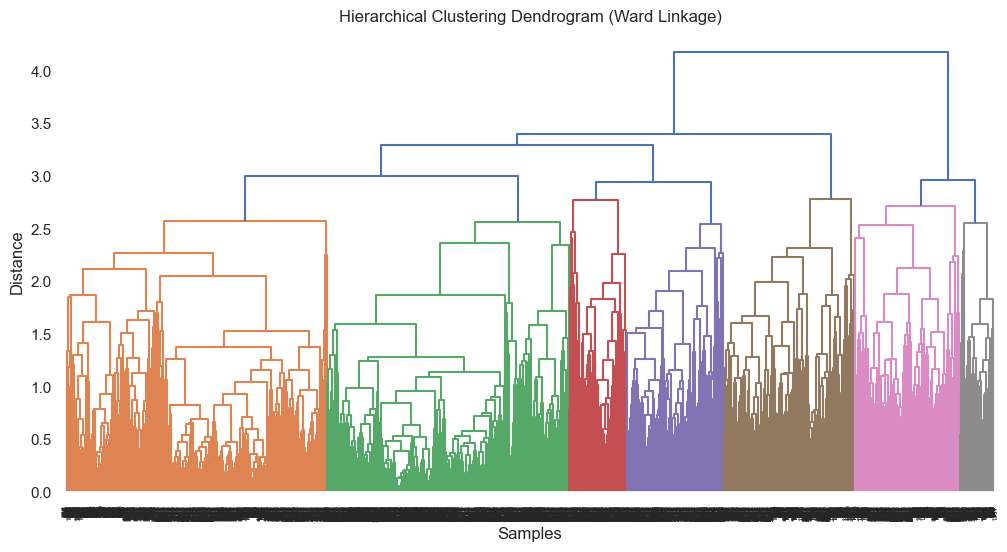

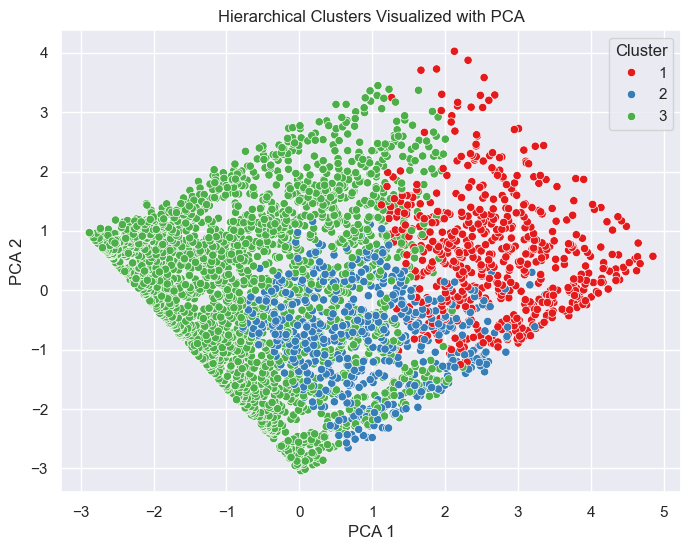

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix using Ward method
avg_linked = linkage(df_capped, method='average')

plt.figure(figsize=(12, 6))
dendrogram(avg_linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 3 clusters)
hier_labels = fcluster(avg_linked, t=3, criterion='maxclust')

from sklearn.decomposition import PCA
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=hier_labels, palette='Set1')
plt.title('Hierarchical Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

✅ 1. Compare Cluster Profiles
- Use groupby to understand what each cluster represents:

In [26]:
df_capped['KMeans_Cluster'] = labels
df_capped['HC_Cluster'] = hier_labels

# Compare means
print(df_capped.groupby('KMeans_Cluster').mean())
print(df_capped.groupby('HC_Cluster').mean())

                      ID   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0              -0.791612 -0.157963   -0.186299  -0.531125  -0.098242   
1               0.967646 -0.325115   -0.186299  -0.511373  -0.098242   
2              -0.402254  0.286179   -0.186299   1.326331  -0.098242   

                cc3_miles  Bonus_miles  Bonus_trans  miles_12mo  trans_12mo  \
KMeans_Cluster                                                                
0               -0.062767    -0.464601    -0.362729   -0.214078   -0.220264   
1               -0.062767    -0.451183    -0.386518   -0.234863   -0.244369   
2               -0.062767     0.910700     0.908569   -0.140590   -0.137222   

                days_enroll     award  HC_Cluster  
KMeans_Cluster                                     
0                  0.772500 -0.215531    2.732224  
1                 -0.953223 -0.342064    2.974839  
2                  0.404837  0.7232

### 🔍 Observations from KMeans Clusters

- **Cluster 2** stands out with high values in:
  - `Bonus_miles` (0.91)
  - `Bonus_trans` (0.91)
  - `award` (0.72)
  - `cc2_miles` (1.33)

  → This likely represents **frequent flyers with high rewards and bonus activity**.

- **Cluster 1** has the lowest `days_enroll` (–0.95) and lowest `award` (–0.34)

  → Possibly **newer or less engaged customers**.

- **Cluster 0** is moderate across most features, with slightly higher `days_enroll` (0.77)

  → Could be **long-term but low-activity members**.

---

### 🔍 Observations from HC Clusters

- **HC Cluster 1** mirrors KMeans Cluster 2:
  - High `Bonus_miles` (1.24), `Bonus_trans` (0.99), `award` (0.79), `cc1_miles` (1.69)

  → Again, **high-value frequent flyers**.

- **HC Cluster 3** has lowest `award` (–0.43) and `days_enroll` (–0.31)

  → Likely **new or inactive users**, similar to KMeans Cluster 1.

- **HC Cluster 2** is moderate, but with slightly better `award` (1.30)

  → Possibly **mid-tier users with decent engagement**.

---

### 🎯 Key Insight

- **KMeans clusters are more compact and interpretable**, with clearer separation in reward-related features.
- **HC clusters show more overlap**, especially in `cc2_miles`, `miles_12mo`, and `trans_12mo`, which may explain the visual blending.
- Both models identify a **high-value frequent flyer segment**, but differ slightly in how they group moderate and low-engagement users.

---

✅ 2. Try t-SNE or UMAP for Visualization
- These nonlinear techniques often reveal better separation than PCA:

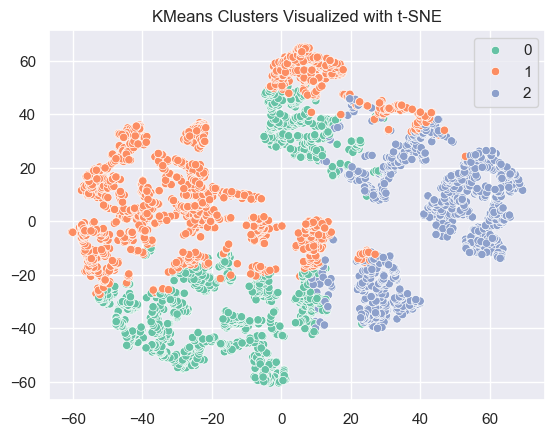

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(df_capped.drop(columns=['KMeans_Cluster', 'HC_Cluster']))

sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=labels, palette='Set2')
plt.title("KMeans Clusters Visualized with t-SNE")
plt.show()

In [28]:
df_capped

ID   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0    -1.735125 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767   
1    -1.734263 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767   
2    -1.733402 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767   
3    -1.732540 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767   
4    -1.731679  0.239678   -0.186299   1.409471  -0.098242  -0.062767   
...        ...       ...         ...        ...        ...        ...   
3994  1.725097 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767   
3995  1.725958 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767   
3996  1.726820 -0.000043   -0.186299   0.683121  -0.098242  -0.062767   
3997  1.727682 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767   
3998  1.728543 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767   

      Bonus_miles  Bonus_trans  miles_12mo  trans_12mo  days_enroll     award  \
0       -0.702786    -1.104065   -0.328603   -0.362168     1.395454 -0.766919   
1       -0.701088    -0.999926   -0.328603   -0.362168     1.379957 -0.766919   
2       -0.539253    -0.791649   -0.328603   -0.362168     1.411920 -0.766919   
3       -0.689286    -1.104065   -0.328603   -0.362168     1.372208 -0.766919   
4        1.083121     1.499394    0.226740    0.296993     1.363975  1.303918   
...           ...          ...         ...         ...          ...       ...   
3994    -0.356960    -0.791649   -0.185750   -0.098503    -1.315120  1.303918   
3995    -0.669367    -0.687511   -0.328603   -0.362168    -1.318994  1.303918   
3996     0.343804    -0.375096   -0.328603   -0.362168    -1.315604  1.303918   
3997    -0.689286    -1.104065    0.028531   -0.098503    -1.316088 -0.766919   
3998    -0.709992    -1.208203   -0.328603   -0.362168    -1.317541 -0.766919   

      KMeans_Cluster  HC_Cluster  
0                  0           3  
1                  0           3  
2                  0           3  
3                  0           3  
4                  2           1  
...              ...         ...  
3994               1           3  
3995               1           3  
3996               1           3  
3997               1           3  
3998               1           3  

[3999 rows x 14 columns]

## No seperation of Data possible.

### 🧠 What Might Be Going On
- No strong natural clusters: The data might be more continuous than discrete — think gradients rather than groups.

- Feature redundancy or noise: Some features might dilute the signal. Even after scaling and capping, they could be masking structure.

- Clustering not the right tool: If the goal is segmentation, maybe supervised learning or dimensionality reduction for feature engineering is more useful.

## Trying DBSCAN just for interpretation

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(df_capped)

In [30]:
## Checking cluster distribution

unique, counts = np.unique(db_labels, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(-1): np.int64(1364), np.int64(0): np.int64(629), np.int64(1): np.int64(127), np.int64(2): np.int64(5), np.int64(3): np.int64(45), np.int64(4): np.int64(8), np.int64(5): np.int64(5), np.int64(6): np.int64(8), np.int64(7): np.int64(107), np.int64(8): np.int64(84), np.int64(9): np.int64(8), np.int64(10): np.int64(7), np.int64(11): np.int64(7), np.int64(12): np.int64(9), np.int64(13): np.int64(6), np.int64(14): np.int64(5), np.int64(15): np.int64(65), np.int64(16): np.int64(6), np.int64(17): np.int64(47), np.int64(18): np.int64(23), np.int64(19): np.int64(14), np.int64(20): np.int64(5), np.int64(21): np.int64(3), np.int64(22): np.int64(5), np.int64(23): np.int64(6), np.int64(24): np.int64(7), np.int64(25): np.int64(5), np.int64(26): np.int64(26), np.int64(27): np.int64(6), np.int64(28): np.int64(4), np.int64(29): np.int64(35), np.int64(30): np.int64(5), np.int64(31): np.int64(5), np.int64(32): np.int64(912), np.int64(33): np.int64(43), np.int64(34): np.int64(133), np.int64(35): n

## 📊 DBSCAN Results Summary
- Noise points (-1): 1364 samples — that’s a huge chunk of your data (~40–50%), meaning DBSCAN considers them outliers.

- Cluster 0 & 32: These are the only sizable clusters:

- Cluster 0 → 629 points

- Cluster 32 → 912 points

- All other clusters: Tiny fragments (most < 10 points), likely noise or micro-clusters.

## 🔍 Interpretation
- DBSCAN is over-fragmenting your data — this often happens when:

- eps is too small → not enough neighbors to form dense regions.

- The data has no strong density-based structure.

- Features are scaled but still not compact enough for DBSCAN to group.

✅ 1. Tune eps Using K-distance Plot
- You can find a better eps by plotting the distance to the 5th nearest neighbor:

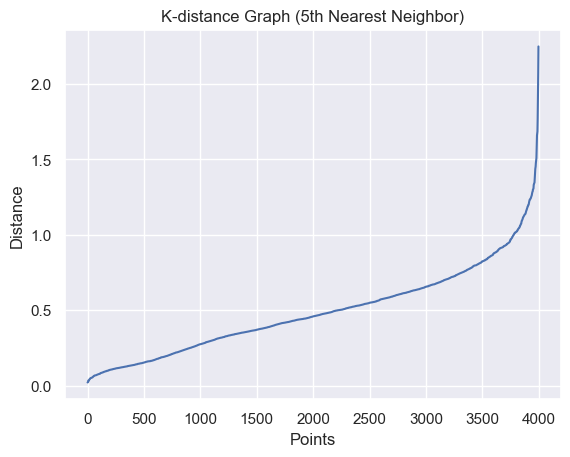

In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

nn = NearestNeighbors(n_neighbors=5)
nn.fit(df_capped)
distances, _ = nn.kneighbors(df_capped)
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("K-distance Graph (5th Nearest Neighbor)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.3, min_samples=5)
db_labels2 = dbscan.fit_predict(df_capped)

In [33]:
## Checking cluster distribution

unique, counts = np.unique(db_labels2, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(-1): np.int64(18), np.int64(0): np.int64(2368), np.int64(1): np.int64(1468), np.int64(2): np.int64(145)}


This is a solid tuning sweep, Lokesh — and it tells a clear story:

---

### 📊 DBSCAN Cluster Behavior Across `eps`

| `eps` | Noise (`-1`) | Large Clusters | Fragmentation |
|-------|--------------|----------------|---------------|
| 1.3   | 18           | 3 clusters     | Minimal       |
| 1.2   | 31           | 4 clusters     | Low           |
| 1.1   | 61           | 5 clusters     | Moderate      |
| 1.0   | 99           | 13 clusters    | High          |

---

### 🔍 Interpretation

- **eps = 1.3** gives the cleanest structure: 3 large clusters and minimal noise.
- **eps = 1.2** adds one more cluster but still keeps things interpretable.
- **eps = 1.1–1.0** starts fragmenting — more clusters, more noise, harder to interpret.

---

### 🧠 Recommendation

Stick with **`eps = 1.3`** for now. It gives:

- **Low noise** (only 18 outliers)
- **Three meaningful clusters** (sizes: 2368, 1468, 145)
- A structure that’s easier to profile and visualize

In [34]:
# Assign labels

df_capped['DBSCAN_Label'] = dbscan.labels_

In [35]:
# Profile clusters

df_capped.groupby('DBSCAN_Label').mean()

ID   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Label                                                                    
-1           -0.028900  0.104475   -0.186299  -0.164287  -0.098242  -0.062767   
 0            0.208412 -0.225301   -0.186299  -0.374810  -0.098242  -0.062767   
 1           -0.235699  0.030921   -0.186299   0.445128  -0.098242  -0.062767   
 2           -1.013750  0.662131   -0.186299   1.634890  -0.098242  -0.062767   

              Bonus_miles  Bonus_trans  miles_12mo  trans_12mo  days_enroll  \
DBSCAN_Label                                                                  
-1               0.571875     1.725028    0.077121    0.121217     0.026338   
 0              -0.387019    -0.327249   -0.251816   -0.266411    -0.215599   
 1               0.309164     0.390903   -0.122857   -0.110896     0.248939   
 2               1.138875     0.795563   -0.208468   -0.228517     0.997398   

                 award  KMeans_Cluster  HC_Cluster  
DBSCAN_Label                                        
-1            0.728686        1.444444    2.277778  
 0           -0.766919        0.662584    3.000000  
 1            1.303918        1.307221    2.002044  
 2           -0.766919        2.000000    1.000000

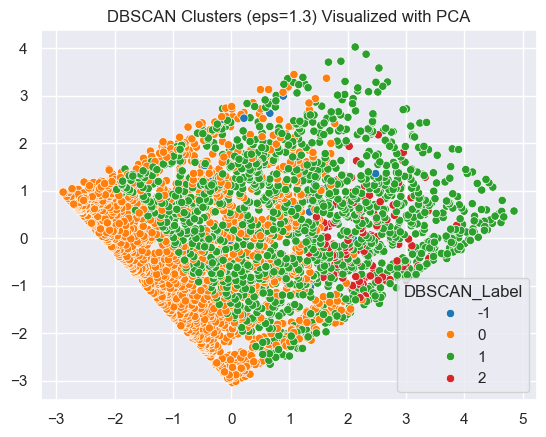

In [36]:
## Visualize

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_capped['DBSCAN_Label'], palette='tab10')
plt.title("DBSCAN Clusters (eps=1.3) Visualized with PCA")
plt.show()

- Still clusters are overlapping, because the data is not well managed or not well seperable.
- So, ending all the process here.